# Background:
Your friend is a big music buff and at every party starts to play his favorite drinking game „which year was it“. 

The game consists of someone choosing a random song and playing it to the audience. Whomever correctly identifies the year in which the song was released does not have to drink, everyone else has to.

You decide that it is time to turn this around and start developing an algorithm to teach your friend a lesson.



# Task:
Build a model achieving the desired outcome, quantify its performance, describe your approach and recommend a way forward to your management. 

Describe also how you would ensure, together with your Data Engineering colleagues, that the model is deployed, its performance is being monitored and it is being constantly adapted.


In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Set Information:


<table border="1" cellpadding="6">
	<tbody><tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">515345</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>

	<tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
		<td><p class="normal">Real</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
		<td><p class="normal">90</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
		<td><p class="normal">2011-02-07</p></td>
	</tr>
	<tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">111649</p></td>
	</tr>
	<!--
	<tr>

		<td bgcolor="#DDEEFF"><p class="normal"><b>Highest Percentage Achieved:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
	-->
</tbody></table>


<center>https://archive.ics.uci.edu/ml/datasets/YearPredictionMSD</center>


You should respect the following train / test split: 
train: first 463,715 examples 
test: last 51,630 examples 
It avoids the 'producer effect' by making sure no song 
from a given artist ends up in both the train and test set.


# Attribute Information:

90 attributes, 12 = timbre average, 78 = timbre covariance 

The first value is the year (target), ranging from 1922 to 2011.

Features extracted from the 'timbre' features from The Echo Nest API. 

We take the average and covariance over all 'segments', each segment 
being described by a 12-dimensional timbre vector.



![img](img/Fig1_paper.PNG)

In [2]:
headers = ['Year']
timbre_avg =  12 
timbre_cov = 78   
timbre_avg_headers =  [('timbre_avg_'+str(x)) for x in range(timbre_avg)]
timbre_cov_headers =  [('timbre_cov_'+str(x)) for x in range(timbre_cov)]

headers = headers + timbre_avg_headers +  timbre_cov_headers

In [3]:
data = pd.read_csv('data/YearPredictionMSD.txt', names=headers)

In [4]:
data.head()

,Year,timbre_avg_0,timbre_avg_1,timbre_avg_2,timbre_avg_3,timbre_avg_4,timbre_avg_5,timbre_avg_6,timbre_avg_7,timbre_avg_8,...,timbre_cov_68,timbre_cov_69,timbre_cov_70,timbre_cov_71,timbre_cov_72,timbre_cov_73,timbre_cov_74,timbre_cov_75,timbre_cov_76,timbre_cov_77
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [5]:
data.tail()

,Year,timbre_avg_0,timbre_avg_1,timbre_avg_2,timbre_avg_3,timbre_avg_4,timbre_avg_5,timbre_avg_6,timbre_avg_7,timbre_avg_8,...,timbre_cov_68,timbre_cov_69,timbre_cov_70,timbre_cov_71,timbre_cov_72,timbre_cov_73,timbre_cov_74,timbre_cov_75,timbre_cov_76,timbre_cov_77
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909
515344,2005,51.85726,59.11655,26.39436,-5.46030,-20.69012,-19.95528,-6.72771,2.29590,10.31018,...,-11.50511,-69.18291,60.58456,28.64599,-4.39620,-64.56491,-45.61012,-5.51512,32.35602,12.17352


Text(0.5,1,'Distribution of songs by year')

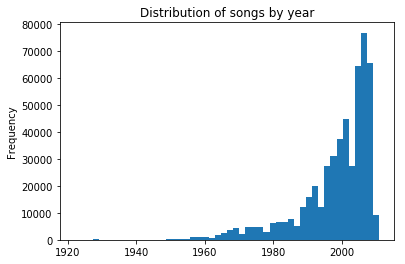

In [6]:
data['Year'].plot.hist(bins=50)
plt.title('Distribution of songs by year')

In [7]:
data['timbre_avg'] = data[timbre_avg_headers].mean(axis=1)
data['timbre_cov_avg'] = data[timbre_cov_headers].mean(axis=1)

data['timbre_max'] = data[timbre_avg_headers].max(axis=1)
data['timbre_cov_max'] = data[timbre_cov_headers].max(axis=1)

data['timbre_min'] = data[timbre_avg_headers].min(axis=1)
data['timbre_cov_min'] = data[timbre_cov_headers].min(axis=1)

data['timbre_std'] = data[timbre_avg_headers].std(axis=1)
data['timbre_cov_std'] = data[timbre_cov_headers].std(axis=1)

data['timbre_median'] = data[timbre_avg_headers].median(axis=1)
data['timbre_cov_median'] = data[timbre_cov_headers].median(axis=1)

In [8]:
data.loc[:,'timbre_avg':'timbre_cov_median'].head(5)

,timbre_avg,timbre_cov_avg,timbre_max,timbre_cov_max,timbre_min,timbre_cov_min,timbre_std,timbre_cov_std,timbre_median,timbre_cov_median
0,7.655009,53.460320,73.07750,951.08960,-25.01202,-317.87038,28.608080,178.362637,0.503075,3.479260
1,12.419617,83.763504,70.32679,2056.93836,-24.83777,-407.64130,25.506573,293.215599,6.679200,17.620260
2,11.860006,48.571940,55.81851,1016.00954,-18.54940,-297.00587,23.142331,195.192180,2.065355,6.099225
3,4.597080,76.461239,48.24750,2174.08189,-26.21683,-181.34947,19.842678,298.262721,1.779730,7.237375
4,10.966413,47.632014,67.09964,894.28471,-16.81409,-295.98542,27.726378,176.476156,1.900730,2.056130


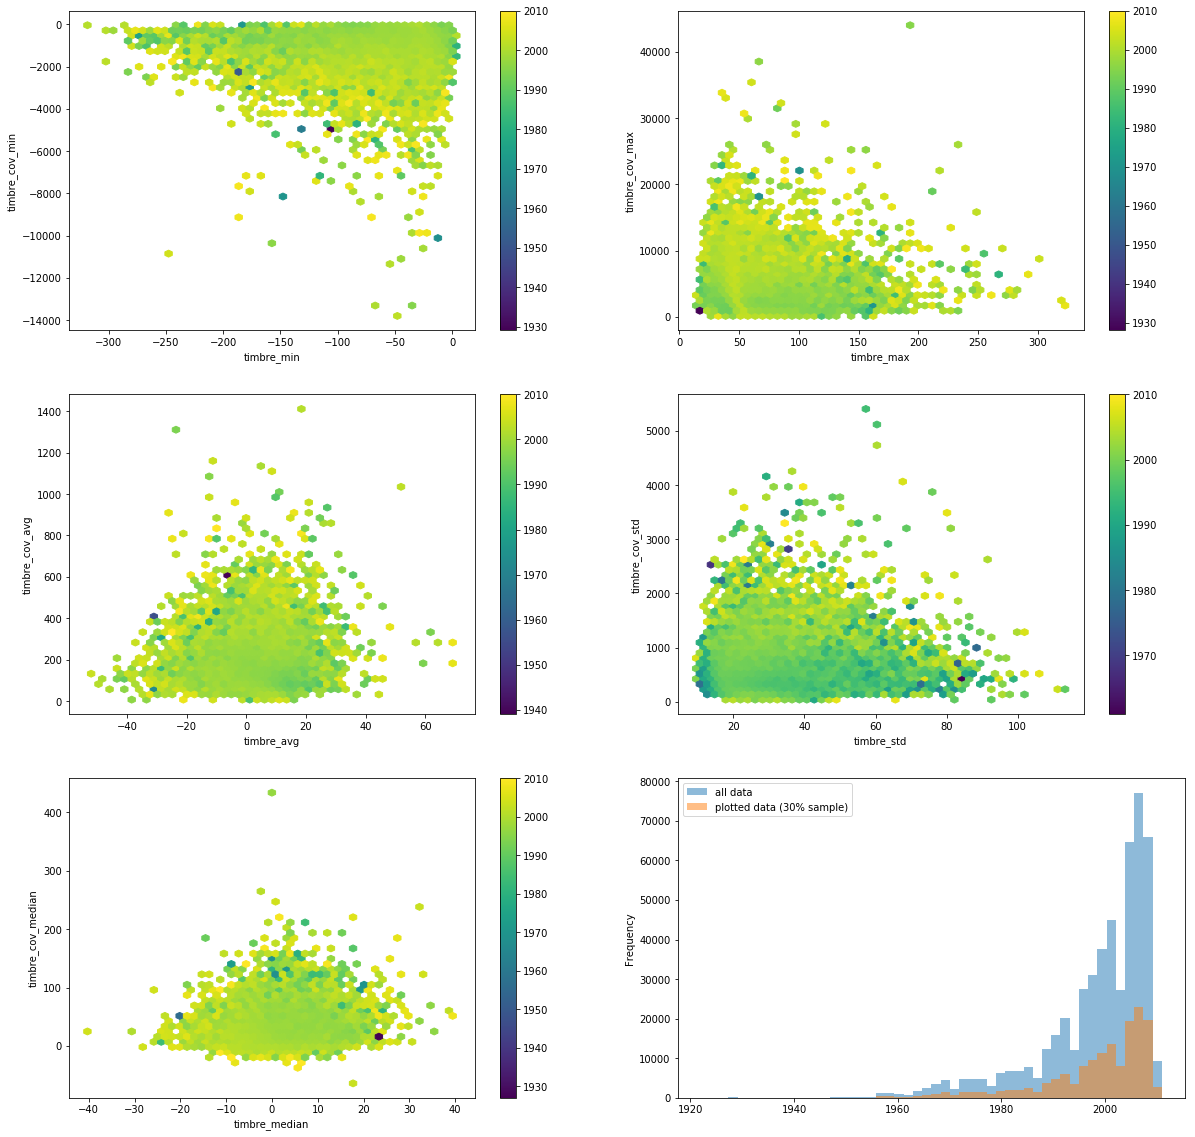

In [9]:
data_sample =  data.sample(frac=0.3)


fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,20))


data_sample.plot.hexbin(x='timbre_min', y='timbre_cov_min', C='Year',
                        gridsize=50, ax=ax[0,0], cmap=plt.cm.viridis)

data_sample.plot.hexbin(x='timbre_max', y='timbre_cov_max', C='Year',
                        gridsize=50, ax=ax[0,1], cmap=plt.cm.viridis)

data_sample.plot.hexbin(x='timbre_avg', y='timbre_cov_avg', C='Year',
                        gridsize=50, ax=ax[1,0], cmap=plt.cm.viridis)

data_sample.plot.hexbin(x='timbre_std', y='timbre_cov_std', C='Year',
                        gridsize=50, ax=ax[1,1], cmap=plt.cm.viridis)

data_sample.plot.hexbin(x='timbre_median', y='timbre_cov_median', C='Year',
                        gridsize=50, ax=ax[2,0], cmap=plt.cm.viridis)

data['Year'].plot.hist(bins=50, ax=ax[2,1],
                       label='all data', alpha=0.5)
data_sample['Year'].plot.hist(bins=50, ax=ax[2,1],
                              label='plotted data (30% sample)', alpha=0.5)

plt.legend();

plt.show()

# Building a model

First, we need to split the data between the training and testing subsets:

In [10]:
X_train = data.values[:463715,1:]
y_train = data.values[:463715,0]

In [11]:
X_train.shape

(463715, 100)

In [12]:
X_test = data.values[463715:,1:]
y_test = data.values[463715:,0]

In [13]:
y_test.shape

(51630,)

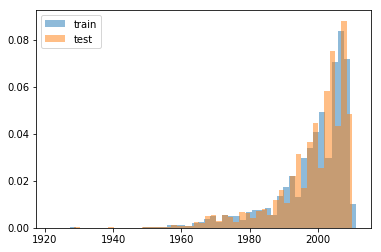

In [14]:
plt.hist(y_train, label='train', bins=50, alpha=0.5, density=True)
plt.hist(y_test, label='test',  bins=50, alpha=0.5, density=True)
plt.legend();

It look's like the suggested split training/test was done fairly well.

The high dimensionality and number of entries (rows) will be a problem against performance.

# Stochastic Gradient Descent

As a first attempt, we will be using Stochastic Gradient Descent:
http://scikit-learn.org/stable/modules/sgd.html#classification

The advantages of Stochastic Gradient Descent are:

- Efficiency.
- Ease of implementation (lots of opportunities for code tuning).
The disadvantages of Stochastic Gradient Descent include:

- SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
- SGD is sensitive to feature scaling.

We need to scale the variables

In [15]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)  # apply same transformation to test data

In [16]:
X =  X_train_scaled #[:10000,:]
y = y_train#[:10000]

We are ready:

In [17]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000, tol=1e-3, n_jobs=4)
clf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=4, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=0.001, verbose=0, warm_start=False)

In [18]:
y_pred = clf.predict(X_test_scaled)

In [19]:
y_test[:10]

array([2007., 2003., 2005., 2003., 2005., 2007., 2003., 2003., 2003.,
       2005.])

In [37]:
y_pred[:10]

array([1992., 2006., 1983., 2004., 2004., 1998., 2005., 1986., 2000.,
       1998.])

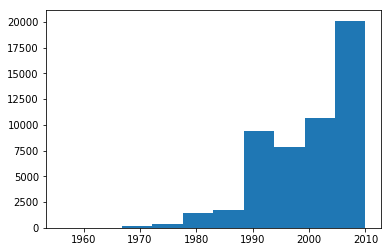

In [38]:
plt.hist(y_pred);

In [51]:
def myscore(pred, truth):
    score = np.sum(pred==truth)/ len(truth)
    print('accuracy (%):', 100*score)
    return score

def error_score(pred, truth):
    abs_error = np.sum(np.abs(pred-truth))
    mean_error = np.mean(np.abs(pred-truth))
    std_error = np.std(np.abs(pred-truth))
    
    print('abs_error:', abs_error)
    print('mean_error:', mean_error)
    print('std_error:', std_error)
    
    return abs_error, mean_error, std_error

In [22]:
_ = error_score(y_pred, y_test)

abs_error: 424020.0
mean_error: 8.21266705403835
std_error: 8.266134149046348


In [23]:
_ = myscore(y_pred, y_test)

accuracy (%): 5.824133255858997


### 5.8% of accuracy seems very low but according to the original source...

![img](img/training_paper.png)

We should be suspicius baout this low numbers. For exampel, given the skewed distribution of the data towards the 2000's, a random guess will be also worth to try it as a model.

In [24]:
y_random = np.random.choice(range(2005,2010), size=len(y_pred))

In [25]:
_ = myscore(y_random, y_test)

accuracy (%): 6.9920588804958355


# A random guess between 2005 and 2010 gives as a better probability of winning the game (~7%) than our sophisticated model.

In [26]:
_ = error_score(y_random, y_test)

abs_error: 472496.0
mean_error: 9.151578539608755
std_error: 10.417851217264875


If we fit the actual distribution the model and use it for the random guesses
http://danielhnyk.cz/fitting-distribution-histogram-using-python/

In [27]:
from scipy import stats

In [28]:
year_data = data_sample['Year'].values # reversed

In [29]:
a1, b1, loc1, scale1 = stats.beta.fit(year_data)

C:\Users\franz\Miniconda3\lib\site-packages\scipy\stats\_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\franz\Miniconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


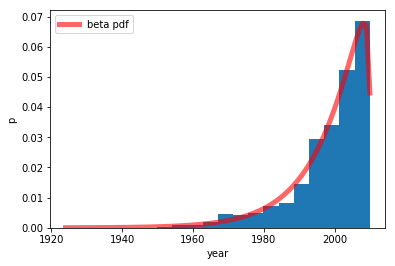

In [31]:
x_prob = np.linspace(year_data.min(), year_data.max(),
                      (year_data.max()-year_data.min()),
                     endpoint=True)

plt.hist(year_data, bins=20, density=True)
plt.xlabel('year')
plt.ylabel('p')

p_prob = stats.beta.pdf(x_prob, a1, b1, loc1, scale1)
plt.plot(x_prob, p_prob,
       'r-', lw=5, alpha=0.6, label='beta pdf')

plt.legend()

In [32]:
y_random = np.random.choice(np.ceil(x_prob), size=len(y_test), p=p_prob/p_prob.sum())

In [33]:
y_random

array([1997., 2008., 1996., ..., 2007., 1998., 2007.])

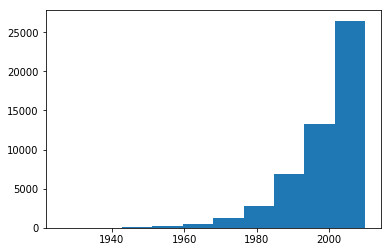

In [34]:
plt.hist(y_random);

In [35]:
_ = myscore(y_random, np.random.permutation(y_test))

accuracy (%): 4.051907805539415


In [36]:
_ = error_score(y_random, np.random.permutation(y_test))

abs_error: 562479.0
mean_error: 10.894421847762928
std_error: 10.491996796367163


# High dimensional plots

In [172]:
data_sample =  data.sample(frac=0.001)

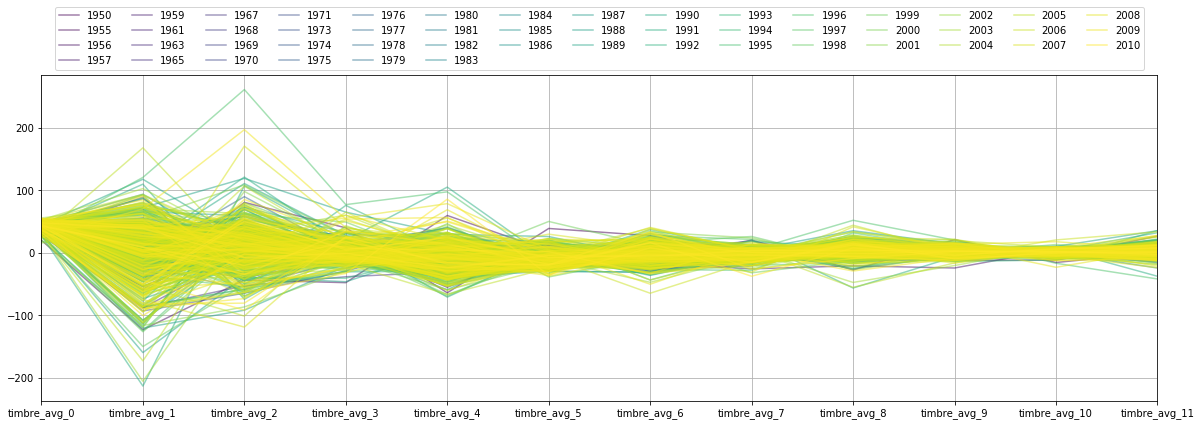

In [173]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(20,6))

parallel_coordinates(data_sample.sort_values('Year'), class_column='Year',                     
                     cols=timbre_avg_headers, colormap='viridis',
                     axvlines=False, alpha=0.5)


plt.legend(loc='lower center' ,bbox_to_anchor=(0.5, 1.), ncol=15);

In [175]:
data_sample =  data.sample(frac=0.3)

data_sample_by_year = data_sample.groupby(by='Year', as_index=False).mean()
data_sample_by_year.head()

,Year,timbre_avg_0,timbre_avg_1,timbre_avg_2,timbre_avg_3,timbre_avg_4,timbre_avg_5,timbre_avg_6,timbre_avg_7,timbre_avg_8,...,timbre_avg,timbre_cov_avg,timbre_max,timbre_cov_max,timbre_min,timbre_cov_min,timbre_std,timbre_cov_std,timbre_median,timbre_cov_median
0,1922,41.026740,31.161530,11.534180,32.739750,24.295490,20.635780,-2.493370,0.083130,-14.117590,...,10.229037,193.870752,41.026740,3758.203410,-14.117590,-916.251100,19.180076,666.666449,5.808655,19.711605
1,1925,33.116283,-117.161407,94.716107,9.385303,42.591260,17.813437,-71.411650,6.528637,17.408227,...,6.022881,166.750815,98.237103,3069.318987,-139.570760,-1170.831033,57.634542,645.175479,14.045513,40.294418
2,1926,34.054790,-132.565210,88.539032,7.797577,-7.278222,1.859560,-36.995007,8.203220,-11.750185,...,-2.179639,97.306571,88.559147,1637.498322,-139.017638,-482.615063,54.141139,328.364967,5.447454,17.632500
3,1927,30.945802,-136.915338,65.885620,8.402135,-12.688955,7.985388,-13.517310,16.808849,-40.773285,...,-7.080029,126.875472,68.094854,2221.492130,-136.915338,-577.731982,52.373380,462.799471,1.057084,11.579937
4,1928,33.237432,-90.276498,37.727069,-2.699316,-30.225211,16.633673,-38.098703,6.032914,4.199032,...,-3.785018,151.635664,46.254964,2640.282208,-90.937543,-550.760901,39.052005,477.643804,3.782691,29.996062


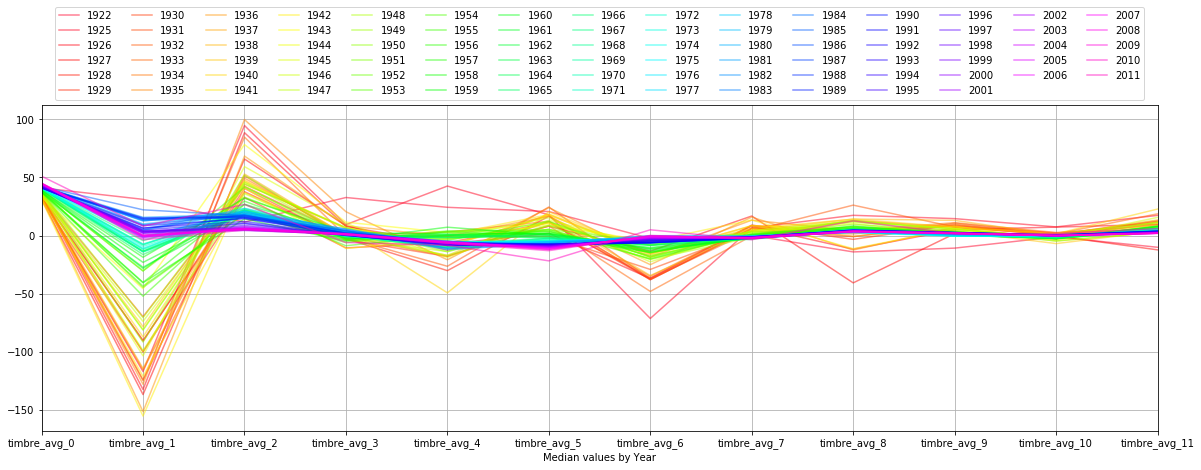

In [176]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(20,6))

parallel_coordinates(data_sample_by_year, class_column='Year',
                     cols=timbre_avg_headers, colormap='gist_rainbow',
                     axvlines=False, alpha=0.5)


plt.legend(loc='lower center' ,bbox_to_anchor=(0.5, 1.), ncol=15);
plt.xlabel('Median values by Year');

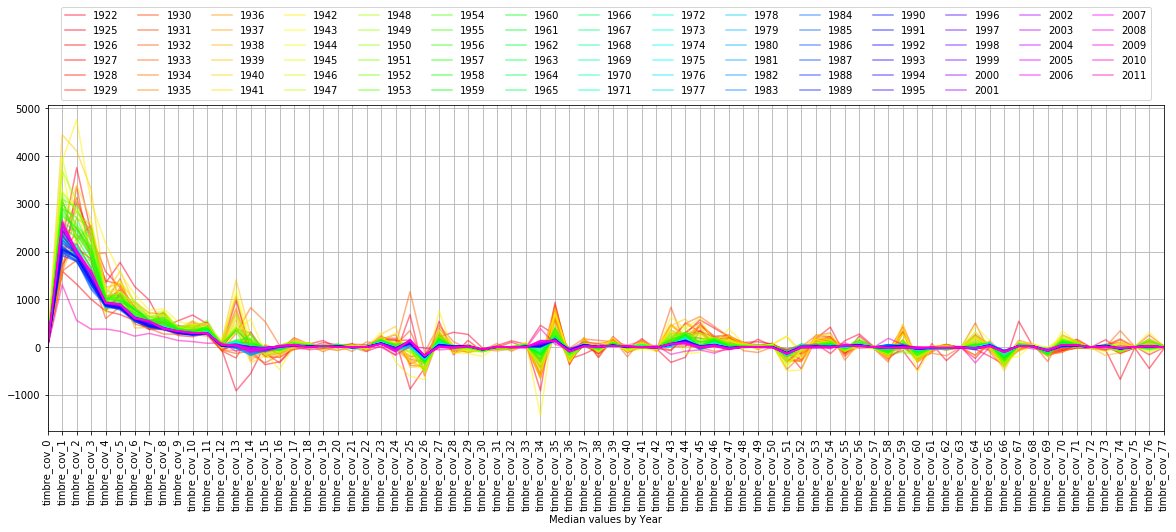

In [177]:
plt.figure(figsize=(20,6))

parallel_coordinates(data_sample_by_year, class_column='Year',
                     cols=timbre_cov_headers, colormap='gist_rainbow',
                     axvlines=False, alpha=0.5)

plt.legend(loc='lower center' ,bbox_to_anchor=(0.5, 1.), ncol=15)
plt.xticks(rotation='vertical');
plt.xlabel('Median values by Year');

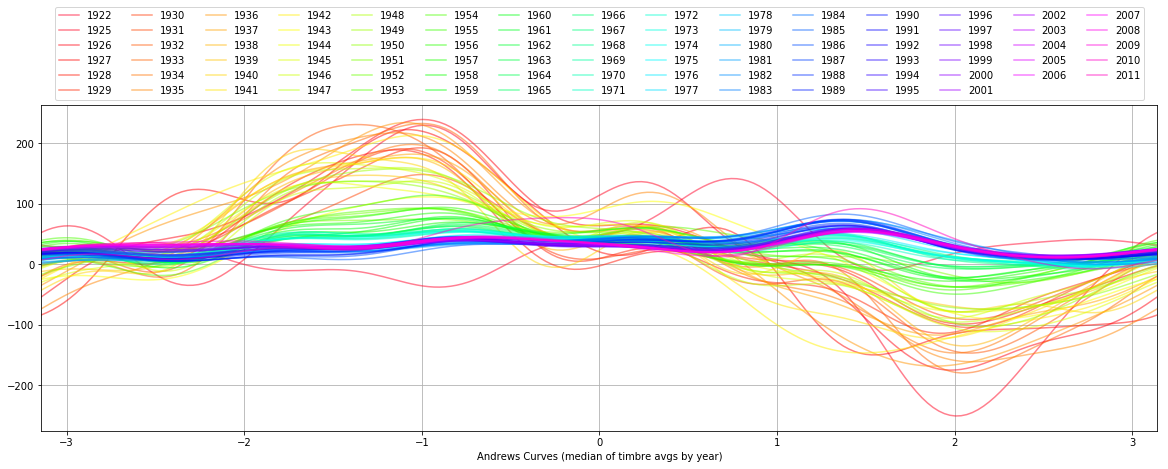

In [178]:
from pandas.plotting import andrews_curves

plt.figure(figsize=(20,6))

andrews_curves(data_sample_by_year.loc[:, 'Year':'timbre_avg_11'], 'Year',
               alpha=0.5, colormap='gist_rainbow')

plt.legend(loc='lower center' ,bbox_to_anchor=(0.5, 1.), ncol=15)
plt.xlabel('Andrews Curves (median of timbre avgs by year)');

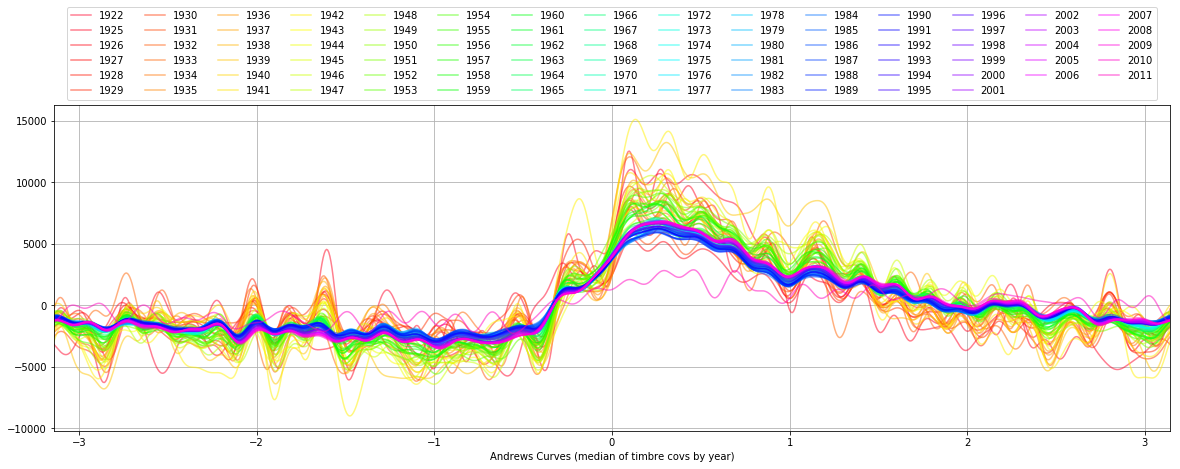

In [179]:
plt.figure(figsize=(20,6))

year_and_timbre_cov_indexes = ['Year']+timbre_cov_headers
andrews_curves(data_sample_by_year[year_and_timbre_cov_indexes], 'Year',
               alpha=0.5, colormap='gist_rainbow', samples=1000)

plt.legend(loc='lower center' ,bbox_to_anchor=(0.5, 1.), ncol=15)
plt.xlabel('Andrews Curves (median of timbre covs by year)');

# Building a simplified model

In [180]:
data_grouped = data.iloc[:463715,:].groupby(by='Year', as_index=False).mean() # Only grouping the training data

In [181]:
data_grouped.head()

,Year,timbre_avg_0,timbre_avg_1,timbre_avg_2,timbre_avg_3,timbre_avg_4,timbre_avg_5,timbre_avg_6,timbre_avg_7,timbre_avg_8,...,timbre_avg,timbre_cov_avg,timbre_max,timbre_cov_max,timbre_min,timbre_cov_min,timbre_std,timbre_cov_std,timbre_median,timbre_cov_median
0,1922,41.563847,13.908623,14.684642,24.427253,18.752738,11.173280,-5.309713,0.136818,-2.164830,...,8.795465,163.786115,69.642638,3055.671513,-44.424205,-1024.676897,30.278037,571.160580,3.352256,23.253262
1,1924,36.945466,-136.050156,108.086914,12.351610,-7.730282,1.872898,-32.485724,3.362986,14.375366,...,1.857397,124.724049,108.086914,1750.374998,-136.050156,-715.644244,57.554032,399.389366,7.731990,24.496321
2,1925,34.359443,-128.216647,120.177701,19.374040,18.185651,17.011220,-56.728221,7.616783,3.783979,...,4.767094,151.368138,121.686700,2601.383609,-137.820656,-957.109376,61.523476,537.836414,9.788070,33.066599
3,1926,32.572120,-126.464657,88.917274,7.843321,-5.841375,13.394603,-31.141998,9.859703,-17.412415,...,-2.060732,159.978480,91.039332,2609.753961,-128.502266,-827.156787,53.479763,519.971641,3.321806,34.836318
4,1927,30.983776,-108.975771,56.376868,3.542811,-7.610167,9.104995,-20.728775,13.850153,-25.782057,...,-3.921305,137.618802,64.750694,2567.795795,-112.647611,-768.512666,45.651388,505.037877,2.838689,22.128503


In [182]:
data_grouped.tail()

,Year,timbre_avg_0,timbre_avg_1,timbre_avg_2,timbre_avg_3,timbre_avg_4,timbre_avg_5,timbre_avg_6,timbre_avg_7,timbre_avg_8,...,timbre_avg,timbre_cov_avg,timbre_max,timbre_cov_max,timbre_min,timbre_cov_min,timbre_std,timbre_cov_std,timbre_median,timbre_cov_median
84,2007,44.886843,-0.114246,5.908696,1.049448,-5.905374,-11.568121,-0.624745,-2.027971,3.409791,...,3.220166,134.219543,49.777847,2895.680139,-36.446671,-604.945209,23.355378,486.425462,0.972226,17.236580
85,2008,44.970053,0.428995,5.136278,1.200317,-5.097333,-12.087106,-0.544979,-1.964768,3.479645,...,3.280062,134.630793,50.012730,2903.613642,-36.378002,-607.868214,23.367726,488.027885,1.018129,17.094698
86,2009,45.124814,0.605233,5.567852,1.656720,-6.333922,-12.063430,-0.210244,-2.058480,3.606555,...,3.323097,135.210428,50.146537,2942.505827,-36.449314,-624.215945,23.399522,494.538522,1.070002,16.776144
87,2010,45.109055,-2.175159,5.692600,1.280848,-6.696128,-12.820146,-0.050404,-2.429472,3.832905,...,2.975268,131.932385,49.649800,2923.250746,-37.639238,-626.235416,23.472579,488.610815,0.946334,16.253033
88,2011,51.076400,8.056110,26.785990,-6.017960,-8.340820,-21.832060,4.943210,-3.647010,12.605120,...,6.082537,46.402252,51.076400,1307.706180,-21.832060,-330.666040,18.506603,195.312434,3.342025,1.857235


First, we need to split the data between the training and testing subsets:

In [183]:
# X_train = data_grouped.values[:,1:]
# y_train = data_grouped.values[:,0]

In [184]:
X_train = data.iloc[:463715,-10:]
y_train = data.iloc[:463715,0]

In [185]:
X_train.tail()

,timbre_avg,timbre_cov_avg,timbre_max,timbre_cov_max,timbre_min,timbre_cov_min,timbre_std,timbre_cov_std,timbre_median,timbre_cov_median
463710,-3.086930,80.222975,46.38102,1788.44360,-44.80420,-396.84930,22.083720,325.504400,-5.461725,5.495980
463711,-2.126513,117.121038,42.62982,3587.98710,-44.12528,-630.29413,21.599082,502.964265,-2.910015,3.948330
463712,2.984852,61.937781,44.37612,1440.75360,-32.69876,-146.01283,20.649899,235.356934,1.505160,6.032335
463713,-4.262312,122.401946,44.88723,3303.09417,-58.91571,-595.96436,23.713529,478.985480,-4.309540,22.347150
463714,2.574207,29.769601,54.05607,384.22932,-40.51556,-109.31960,28.542204,86.956256,2.223220,6.053800


In [186]:
y_train.tail()

463710    2008
463711    2006
463712    2007
463713    2006
463714    2007
Name: Year, dtype: int64

In [187]:
#X_test = data.iloc[463715:,1:]
#y_test = data.iloc[463715:,0]

In [188]:
X_test = data.iloc[463715:,-10:]
y_test = data.iloc[463715:,0]

In [189]:
y_test.shape

(51630,)

In [190]:
#plt.plot(y_train,np.abs(X_train-X_test[10,:]).sum(axis=1))


In [191]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)  # apply same transformation to test data

In [192]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)  # apply same transformation to test data

In [193]:
X =  X_train_scaled #[:10000,:]
y = y_train#[:10000]

We are ready:

http://scikit-learn.org/stable/modules/neighbors.html

In [202]:
from sklearn import neighbors
n_neighbors = data_grouped['Year'].max()-data_grouped['Year'].min()
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=89, p=2,
           weights='distance')

In [203]:
y_pred = clf.predict(X_test_scaled)

In [204]:
y_test[:10]

463715    2007
463716    2003
463717    2005
463718    2003
463719    2005
463720    2007
463721    2003
463722    2003
463723    2003
463724    2005
Name: Year, dtype: int64

In [205]:
y_pred[:10]

array([2003, 2007, 2002, 2005, 2008, 2008, 2008, 2006, 2008, 2007],
      dtype=int64)

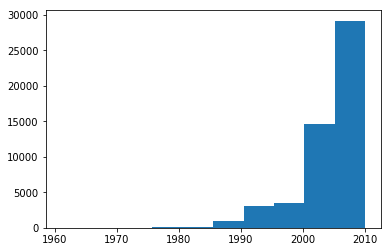

In [206]:
plt.hist(y_pred);

In [210]:
myscore(y_pred,y_test)

accuracy (%): 6.941700561688941


0.0694170056168894

# Stochastic Gradient Descent + Kernel approximation

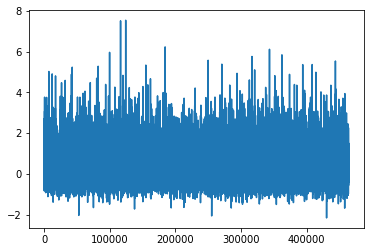

In [258]:
plt.plot(X.mean(axis=1))

http://scikit-learn.org/stable/modules/kernel_approximation.html

In [264]:
from sklearn.kernel_approximation import RBFSampler, SkewedChi2Sampler, AdditiveChi2Sampler
from sklearn.linear_model import SGDClassifier

n_years = data_grouped['Year'].max()-data_grouped['Year'].min()

# rbf_feature = RBFSampler(gamma=1, n_components=n_years, random_state=1)
rbf_feature = SkewedChi2Sampler(skewedness=100, n_components=n_years, random_state=1)
# rbf_feature = AdditiveChi2Sampler()

X_features = rbf_feature.fit_transform(X)

clf = SGDClassifier(max_iter=1000, tol=1e-3, n_jobs=4)   
clf.fit(X_features, y)


clf.score(X_features, y)


0.07633136732691416

In [265]:
y_pred = clf.predict(rbf_feature.fit_transform(X_test_scaled))

In [266]:
y_test[:10].values

array([2007, 2003, 2005, 2003, 2005, 2007, 2003, 2003, 2003, 2005],
      dtype=int64)

In [267]:
y_pred[:10]

array([2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007],
      dtype=int64)

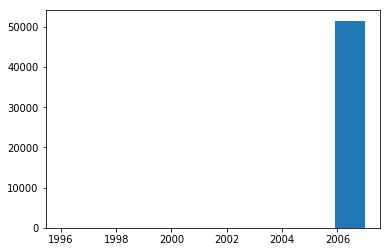

In [268]:
plt.hist(y_pred);

In [269]:
myscore(y_pred,y_test)

accuracy (%): 7.7881076893279095


0.0778810768932791